In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [45]:
model_data = pd.read_csv('./AmesHousing.csv', index_col=0)

In [46]:
model_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [47]:
# descriptive statistics
model_data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [48]:
print('Skewness: %3.2f, Kurtosis: %3.2f' % (model_data['SalePrice'].skew(), model_data['SalePrice'].kurt()))

Skewness: 1.74, Kurtosis: 5.12


In [49]:
corrmat = model_data.corr()
print(corrmat)

                      PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
PID              1.000000    -0.001281     -0.096918  0.034868     -0.263147   
MS SubClass     -0.001281     1.000000     -0.420135 -0.204613      0.039419   
Lot Frontage    -0.096918    -0.420135      1.000000  0.491313      0.212042   
Lot Area         0.034868    -0.204613      0.491313  1.000000      0.097188   
Overall Qual    -0.263147     0.039419      0.212042  0.097188      1.000000   
Overall Cond     0.104451    -0.067349     -0.074448 -0.034759     -0.094812   
Year Built      -0.343388     0.036579      0.121562  0.023258      0.597027   
Year Remod/Add  -0.157111     0.043397      0.091712  0.021682      0.569609   
Mas Vnr Area    -0.229283     0.002730      0.222407  0.126830      0.429418   
BsmtFin SF 1    -0.098375    -0.060075      0.215583  0.191555      0.284118   
BsmtFin SF 2    -0.001145    -0.070946      0.045999  0.083150     -0.041287   
Bsmt Unf SF     -0.087707    -0.130421  

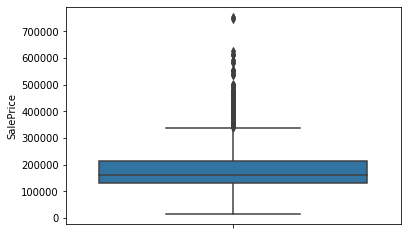

In [50]:
sb.boxplot(y=model_data['SalePrice'])

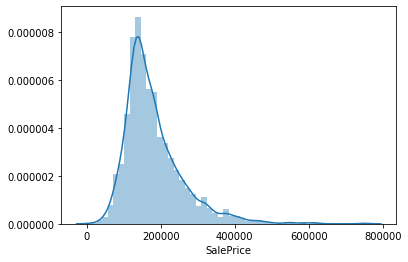

In [51]:
sb.distplot(model_data['SalePrice'])

In [52]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

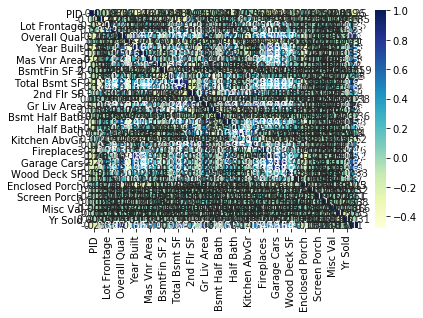

In [53]:
sb.heatmap(corrmat, square=False, annot=True, cmap="YlGnBu")

In [54]:
highestCorr = corrmat.nlargest(7, 'SalePrice')

In [55]:
print(highestCorr)

                    PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
SalePrice     -0.246521    -0.085092      0.357318  0.266549      0.799262   
Overall Qual  -0.263147     0.039419      0.212042  0.097188      1.000000   
Gr Liv Area   -0.107579     0.068061      0.383822  0.285599      0.570556   
Garage Cars   -0.237484    -0.045883      0.308706  0.179512      0.599545   
Garage Area   -0.210606    -0.103239      0.358505  0.212822      0.563503   
Total Bsmt SF -0.189642    -0.219445      0.353773  0.253589      0.547294   
1st Flr SF    -0.141902    -0.247828      0.457391  0.332235      0.477837   

               Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
SalePrice         -0.101697    0.558426        0.532974      0.508285   
Overall Qual      -0.094812    0.597027        0.569609      0.429418   
Gr Liv Area       -0.115643    0.241726        0.316855      0.403611   
Garage Cars       -0.181557    0.537443        0.425403      0.360159   
Garage Are

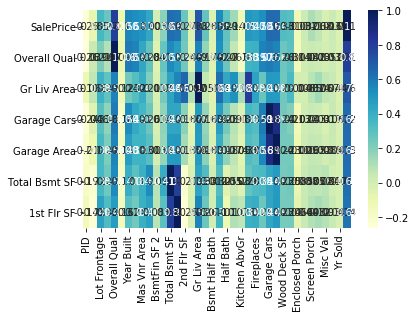

In [56]:
sb.heatmap(highestCorr, square=False, annot=True, cmap="YlGnBu")

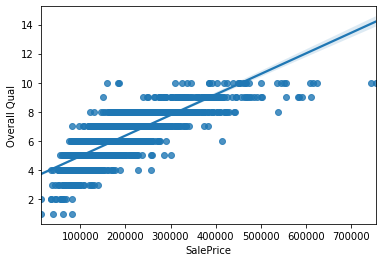

In [57]:
sb.regplot(x='SalePrice', y='Overall Qual', data=model_data)

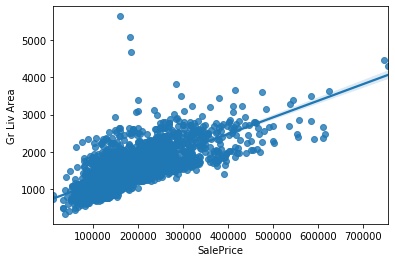

In [58]:
sb.regplot(x='SalePrice', y='Gr Liv Area', data=model_data)

## Imputing Missing Values

### Univariate

In [59]:
pd.options.display.max_rows = 4000

In [60]:
model_data.isnull().sum()

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     

In [61]:
model_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [62]:
# Configure pandas to remove the NA values

model_data = pd.read_csv('./AmesHousing.csv',index_col=0,keep_default_na=False, na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a',  '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ''])

In [63]:
model_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [64]:
# PID is a generated identifier - drop the column
model_data = model_data.drop(['PID'], axis=1)

In [65]:
model_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2930.0,57.387372,42.638025,20.0,20.00,50.0,70.00,190.0
Lot Frontage,2440.0,69.224590,23.365335,21.0,58.00,68.0,80.00,313.0
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,2907.0,101.896801,179.112611,0.0,0.00,0.0,164.00,1600.0
BsmtFin SF 1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,2929.0,49.722431,169.168476,0.0,0.00,0.0,0.00,1526.0


In [66]:
percent_missing = model_data.isnull().sum() * 100 / len(model_data)
missing_value_model_data = pd.DataFrame({'column_name': model_data.columns,'percent_missing': percent_missing})
missing_value_model_data.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
Lot Frontage,Lot Frontage,16.723549
Garage Yr Blt,Garage Yr Blt,5.426621
Mas Vnr Area,Mas Vnr Area,0.784983
Mas Vnr Type,Mas Vnr Type,0.784983
Bsmt Exposure,Bsmt Exposure,0.136519
Garage Finish,Garage Finish,0.068259
BsmtFin Type 2,BsmtFin Type 2,0.068259
Bsmt Half Bath,Bsmt Half Bath,0.068259
Bsmt Full Bath,Bsmt Full Bath,0.068259
Garage Area,Garage Area,0.034130


In [67]:
#Numerical Part\n
model_data['Garage Cars']=model_data['Garage Cars'].fillna(model_data['Garage Cars'].median())
model_data['Total Bsmt SF']=model_data['Total Bsmt SF'].fillna(model_data['Total Bsmt SF'].median())
model_data['Bsmt Unf SF']=model_data['Bsmt Unf SF'].fillna(model_data['Bsmt Unf SF'].median())
model_data['BsmtFin SF 2']=model_data['BsmtFin SF 2'].fillna(model_data['BsmtFin SF 2'].median())
model_data['BsmtFin SF 1']=model_data['BsmtFin SF 1'].fillna(model_data['BsmtFin SF 1'].median())
model_data['Garage Area']=model_data['Garage Area'].fillna(model_data['Garage Area'].median())
model_data['Bsmt Full Bath']=model_data['Bsmt Full Bath'].fillna(model_data['Bsmt Full Bath'].median())
model_data['Bsmt Half Bath']=model_data['Bsmt Half Bath'].fillna(model_data['Bsmt Half Bath'].median())
model_data['Mas Vnr Area']=model_data['Mas Vnr Area'].fillna(model_data['Mas Vnr Area'].median())


In [68]:
#Categorical Part
model_data['Electrical']=model_data['Electrical'].fillna(model_data['Electrical'].value_counts().index[0])
model_data['Garage Cond']=model_data['Garage Cond'].fillna(model_data['Garage Cond'].value_counts().index[0])
model_data['Bsmt Cond']=model_data['Bsmt Cond'].fillna(model_data['Bsmt Cond'].value_counts().index[0])
model_data['BsmtFin Type 1']=model_data['BsmtFin Type 1'].fillna(model_data['BsmtFin Type 1'].value_counts().index[0])
model_data['Bsmt Qual']=model_data['Bsmt Qual'].fillna(model_data['Bsmt Qual'].value_counts().index[0])
model_data['Garage Qual']=model_data['Garage Qual'].fillna(model_data['Garage Qual'].value_counts().index[0])
model_data['BsmtFin Type 2']=model_data['BsmtFin Type 2'].fillna(model_data['BsmtFin Type 1'].value_counts().index[0])
model_data['Garage Finish']=model_data['Garage Finish'].fillna(model_data['Garage Finish'].value_counts().index[0])
model_data['Bsmt Exposure']=model_data['Bsmt Exposure'].fillna(model_data['Bsmt Exposure'].value_counts().index[0])
model_data['Mas Vnr Type']=model_data['Mas Vnr Type'].fillna(model_data['Mas Vnr Type'].value_counts().index[0])

In [69]:
percent_missing = model_data.isnull().sum() * 100 / len(model_data)
missing_value_model_data = pd.DataFrame({'column_name': model_data.columns,'percent_missing': percent_missing})
missing_value_model_data.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
Lot Frontage,Lot Frontage,16.723549
Garage Yr Blt,Garage Yr Blt,5.426621
MS SubClass,MS SubClass,0.000000
Kitchen AbvGr,Kitchen AbvGr,0.000000
Garage Type,Garage Type,0.000000
Fireplace Qu,Fireplace Qu,0.000000
Fireplaces,Fireplaces,0.000000
Functional,Functional,0.000000
TotRms AbvGrd,TotRms AbvGrd,0.000000
Kitchen Qual,Kitchen Qual,0.000000


### Multivariate Imputation

In [70]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (0.23.2)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [71]:
import sklearn
print(sklearn.__version__)

0.23.2


In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [73]:
model_data_features = model_data.drop('SalePrice', axis=1)
model_data_predict = model_data[['SalePrice']]
model_data_features_numerical = model_data_features.loc[:,model_data_features.dtypes!=np.object]
model_data_features_categorical = model_data_features.loc[:,model_data_features.dtypes==np.object]

In [74]:
imputer = IterativeImputer(random_state=100)

In [75]:
imputer.fit(model_data_features_numerical)

IterativeImputer(random_state=100)

In [76]:
imputer.fit(model_data_features_numerical)

IterativeImputer(random_state=100)

In [77]:
imputed_model_data_features_numerical_array = imputer.transform(model_data_features_numerical)

In [78]:
model_data_features_numerical = pd.DataFrame(imputed_model_data_features_numerical_array, columns=model_data_features_numerical.columns)

In [79]:
model_data_features_numerical.reset_index(drop=True, inplace=True)
model_data_features_categorical.reset_index(drop=True, inplace=True)
model_data_predict.reset_index(drop=True, inplace=True)
model_data = pd.concat([model_data_features_numerical, model_data_features_categorical,model_data_predict], axis=1)

In [80]:
model_data.isnull().sum()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
MS Zoning          0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type    

# Drop Features based on Variance Inflation Factor (VIF)

In [81]:
#Section 1
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

#Section 2
def calculate_vif(df, thresh=5):
    
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()
    #Section 3
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]
    #Section 4
    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    return df

In [82]:
calculate_vif(model_data.drop('SalePrice', axis=1)._get_numeric_data())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features above VIF threshold:

                          VIF
Low Qual Fin SF           inf
1st Flr SF                inf
Gr Liv Area               inf
2nd Flr SF                inf
BsmtFin SF 1     2.581050e+04
Total Bsmt SF    2.412622e+04
Bsmt Unf SF      2.401515e+04
BsmtFin SF 2     3.558580e+03
Garage Area      5.879096e+00
Garage Cars      5.783397e+00
Year Built       5.637649e+00


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,20.0,141.000000,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,...,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
1,20.0,80.000000,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
2,20.0,81.000000,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
3,20.0,93.000000,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,...,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
4,60.0,74.000000,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
5,60.0,78.000000,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
6,120.0,41.000000,4920.0,8.0,5.0,2001.0,2001.0,0.0,616.0,0.0,...,582.0,0.0,0.0,170.0,0.0,0.0,0.0,0.0,4.0,2010.0
7,120.0,43.000000,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
8,120.0,39.000000,5389.0,8.0,5.0,1995.0,1996.0,0.0,1180.0,0.0,...,608.0,237.0,152.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
9,60.0,60.000000,7500.0,7.0,5.0,1999.0,1999.0,0.0,0.0,0.0,...,442.0,140.0,60.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0


In [83]:
model_data.drop(columns=['Low Qual Fin SF','Gr Liv Area',
                         '1st Flr SF','2nd Flr SF','BsmtFin SF 1','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2',
                        'Garage Area','Garage Cars','Year Built'],axis=1, inplace=True)

In [84]:
model_data.shape

(2930, 69)

# Removing Outliers

In [85]:
def Outlier_Mask(df):
    Q10 = df.quantile(0.1)
    Q90 = df.quantile(0.9)
    Range = Q90 - Q10
    trueList = ~((df < (Q10 - 1.5 * Range)) |(df > (Q90 + 1.5 * Range)))
    return trueList

In [86]:
outliersFilter= Outlier_Mask(model_data)
model_data = model_data[outliersFilter]
model_data.dropna(inplace=True)

In [87]:
model_data.shape

(2189, 69)

# One Hot Encoding categorical values

In [88]:
model_data = pd.get_dummies(model_data)

In [89]:
model_data.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
3,20.0,93.0,11160.0,7.0,5.0,1968.0,0.0,1.0,0.0,2.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,74.0,13830.0,5.0,5.0,1998.0,0.0,0.0,0.0,2.0,...,0,0,0,1,0,0,0,0,1,0
5,60.0,78.0,9978.0,6.0,6.0,1998.0,20.0,0.0,0.0,2.0,...,0,0,0,1,0,0,0,0,1,0
6,120.0,41.0,4920.0,8.0,5.0,2001.0,0.0,1.0,0.0,2.0,...,0,0,0,1,0,0,0,0,1,0
8,120.0,39.0,5389.0,8.0,5.0,1996.0,0.0,1.0,0.0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
model_data.shape

(2189, 290)

# Features Scaling


In [91]:
from sklearn import preprocessing

In [92]:
model_data_features = model_data.drop('SalePrice', axis=1)
model_data_predict = model_data['SalePrice']

In [93]:
scaler = preprocessing.MinMaxScaler()

In [94]:
scaled_model_data_features_np = scaler.fit_transform(model_data_features)
model_data = pd.DataFrame(scaled_model_data_features_np,columns = model_data_features.columns)
model_data.reset_index(drop=True, inplace=True)
model_data_predict.reset_index(drop=True, inplace=True)
model_data = pd.concat([model_data,model_data_predict], axis=1)

In [95]:
model_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2189.0,0.212990,0.248415,0.0,0.000000,0.176471,0.235294,1.0
Lot Frontage,2189.0,0.319098,0.139193,0.0,0.251701,0.319728,0.401361,1.0
Lot Area,2189.0,0.301519,0.141491,0.0,0.223510,0.296814,0.374815,1.0
Overall Qual,2189.0,0.572154,0.154932,0.0,0.444444,0.555556,0.666667,1.0
Overall Cond,2189.0,0.504536,0.149089,0.0,0.428571,0.428571,0.571429,1.0
Year Remod/Add,2189.0,0.598926,0.348012,0.0,0.300000,0.766667,0.900000,1.0
Mas Vnr Area,2189.0,0.115748,0.190965,0.0,0.000000,0.000000,0.199239,1.0
Bsmt Full Bath,2189.0,0.216766,0.251044,0.0,0.000000,0.000000,0.500000,1.0
Bsmt Half Bath,2189.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Full Bath,2189.0,0.518197,0.176396,0.0,0.333333,0.666667,0.666667,1.0


# Fixing Malformed Distribution

NameError: name 'stats' is not defined

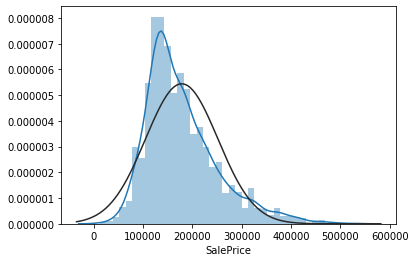

<Figure size 432x288 with 0 Axes>

In [96]:
from scipy.stats import norm
sb.distplot(model_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(model_data['SalePrice'], plot=plt)

In [97]:
model_data['SalePrice'] = np.log(model_data['SalePrice'])

NameError: name 'stats' is not defined

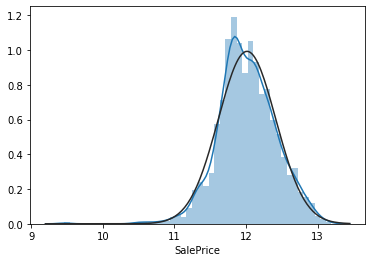

<Figure size 432x288 with 0 Axes>

In [98]:
sb.distplot(model_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(model_data['SalePrice'], plot=plt)